In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
events_df = pd.read_csv(r"events.csv")
category_tree_df = pd.read_csv(r"category_tree.csv")

In [ ]:
item_properties1_df = pd.read_csv(r"item_properties_part1.csv")
item_properties2_df = pd.read_csv(r"item_properties_part2.csv")

In [ ]:
print(events_df.head())
print(category_tree_df.head())
print(item_properties1_df.head())
print(item_properties2_df.head())

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
       timestamp  itemid property            value
0  1433041200000  183478      561          

In [ ]:
#HANDLING MISSING VALUES

In [ ]:
#1. Events Dataset

In [ ]:
# Check for missing values
print(events_df.isnull().sum())

# Drop rows where itemid or visitorid is missing (essential columns)
events_df.dropna(subset=['itemid', 'visitorid'], inplace=True)

# Fill missing transaction IDs with a default value (e.g., -1)
events_df['transactionid'].fillna(-1, inplace=True)

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


<ipython-input-5-10727f1cd1aa>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events_df['transactionid'].fillna(-1, inplace=True)


In [ ]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,-1.0
1,1433224214164,992329,view,248676,-1.0
2,1433221999827,111016,view,318965,-1.0
3,1433221955914,483717,view,253185,-1.0
4,1433221337106,951259,view,367447,-1.0


In [ ]:
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='ms')


In [ ]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,-1.0
1,2015-06-02 05:50:14.164,992329,view,248676,-1.0
2,2015-06-02 05:13:19.827,111016,view,318965,-1.0
3,2015-06-02 05:12:35.914,483717,view,253185,-1.0
4,2015-06-02 05:02:17.106,951259,view,367447,-1.0


In [ ]:
events_df.to_csv("cleaned_events.csv", index=False)

In [ ]:
#2. Category Tree Dataset

In [ ]:
print(category_tree_df.isnull().sum())

# Fill missing parentid with 0 (assuming top-level categories)
category_tree_df['parentid'].fillna(0, inplace=True)

categoryid     0
parentid      25
dtype: int64


<ipython-input-11-2a5d0b2e655a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  category_tree_df['parentid'].fillna(0, inplace=True)


In [ ]:
category_tree_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
category_tree_df.to_csv("cleaned_category_tree.csv", index=False)

In [ ]:
#3. Item Properties Dataset

In [ ]:
print(item_properties1_df.isnull().sum())
print(item_properties2_df.isnull().sum())

# Drop rows where itemid or property is missing
item_properties1_df.dropna(subset=['itemid', 'property'], inplace=True)
item_properties2_df.dropna(subset=['itemid', 'property'], inplace=True)

timestamp    0
itemid       0
property     0
value        0
dtype: int64
timestamp    0
itemid       0
property     0
value        0
dtype: int64


In [ ]:
item_properties1_df['value'].unique()

array(['1338', '1116713 960601 n277.200',
       'n552.000 639502 n720.000 424566', ..., '593887', '529912',
       'n6177084.000'], dtype=object)

In [ ]:
item_properties1_df['value'].isna().sum()

np.int64(0)

In [ ]:
item_properties2_df['value'].unique()

array(['769062', 'n26.400 1135780', '1149317 1257525', ..., '734857',
       'n1020780.000', '888666 n10800.000 746840 1318567'], dtype=object)

In [ ]:
item_properties2_df['value'].isna().sum()

np.int64(0)

In [ ]:
def clean_value(val):
    if pd.isna(val):  # Handle NaN values
        return None

    value = str(val).split()  # Split space-separated values
    cleaned_values = []

    for v in value:
        v = v.lstrip('n')  # Remove 'n' prefix if it exists
        try:
            cleaned_values.append(float(v))  # Convert to float
        except ValueError:
            continue  # Ignore non-numeric values

    return cleaned_values if len(cleaned_values) > 1 else (cleaned_values[0] if cleaned_values else None)

# Apply function to clean the values
item_properties1_df['cleaned_value'] = item_properties1_df['value'].apply(clean_value)

In [ ]:
#Handling Multiple Values for item_properties1

In [ ]:
item_properties1_df = item_properties1_df.explode('cleaned_value')
item_properties1_df['cleaned_value'] = pd.to_numeric(item_properties1_df['cleaned_value'])

In [ ]:
item_properties1_df['cleaned_value'].isna().sum()

np.int64(0)

In [ ]:
item_properties1_df['cleaned_value'].fillna(0, inplace=True)

<ipython-input-24-df5732328e4d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  item_properties1_df['cleaned_value'].fillna(0, inplace=True)


In [ ]:
print(item_properties1_df[['value', 'cleaned_value']].head())

                             value  cleaned_value
0                             1338         1338.0
1          1116713 960601 n277.200      1116713.0
1          1116713 960601 n277.200       960601.0
1          1116713 960601 n277.200          277.2
2  n552.000 639502 n720.000 424566          552.0


In [ ]:
def clean_value(val):
    if pd.isna(val):  # Handle NaN values
        return None

    value = str(val).split()  # Split space-separated values
    cleaned_values = []

    for v in value:
        v = v.lstrip('n')  # Remove 'n' prefix if it exists
        try:
            cleaned_values.append(float(v))  # Convert to float
        except ValueError:
            continue  # Ignore non-numeric values

    return cleaned_values if len(cleaned_values) > 1 else (cleaned_values[0] if cleaned_values else None)

# Apply function to clean the values
item_properties2_df['cleaned_value'] = item_properties2_df['value'].apply(clean_value)

In [ ]:
item_properties1_df['timestamp'] = pd.to_datetime(item_properties1_df['timestamp'], unit='ms')

In [ ]:
item_properties1_df.head()

,timestamp,itemid,property,value,cleaned_value
0,2015-06-28 03:00:00,460429,categoryid,1338,1338.0
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,1116713.0
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,960601.0
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,277.2
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,552.0


In [ ]:
item_properties1_df.to_csv("cleaned_item_properties_part1.csv", index=False)

In [ ]:
#Handling Multiple Values for item_properties2

In [ ]:
item_properties2_df = item_properties2_df.explode('cleaned_value')
item_properties2_df['cleaned_value'] = pd.to_numeric(item_properties2_df['cleaned_value'])

In [ ]:
item_properties2_df['cleaned_value'].isna().sum()

np.int64(0)

In [ ]:
item_properties2_df['cleaned_value'].fillna(0, inplace=True)

<ipython-input-33-24d1b40ad513>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  item_properties2_df['cleaned_value'].fillna(0, inplace=True)


In [ ]:
print(item_properties2_df[['value', 'cleaned_value']].head())

             value  cleaned_value
0           769062       769062.0
1  n26.400 1135780           26.4
1  n26.400 1135780      1135780.0
2  1149317 1257525      1149317.0
2  1149317 1257525      1257525.0


In [ ]:
item_properties2_df['timestamp'] = pd.to_datetime(item_properties2_df['timestamp'], unit='ms')

In [ ]:
item_properties2_df.head()

,timestamp,itemid,property,value,cleaned_value
0,2015-05-31 03:00:00,183478,561,769062,769062.0
1,2015-08-16 03:00:00,132256,976,n26.400 1135780,26.4
1,2015-08-16 03:00:00,132256,976,n26.400 1135780,1135780.0
2,2015-06-28 03:00:00,420307,921,1149317 1257525,1149317.0
2,2015-06-28 03:00:00,420307,921,1149317 1257525,1257525.0


In [ ]:
item_properties2_df.to_csv("cleaned_item_properties_part2.csv", index=False)

In [ ]:
#Remove Duplicates

In [ ]:
events_df.drop_duplicates(inplace=True)
category_tree_df.drop_duplicates(inplace=True)
item_properties1_df.drop_duplicates(inplace=True)
item_properties2_df.drop_duplicates(inplace=True)

In [ ]:
#Convert Datatypes

In [ ]:
print("Min timestamp:", events_df['timestamp'].min())
print("Max timestamp:", events_df['timestamp'].max())

Min timestamp: 2015-05-03 03:00:04.384000
Max timestamp: 2015-09-18 02:59:47.788000


In [ ]:
print(item_properties1_df['timestamp'].dtype)
print(item_properties2_df['timestamp'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# Remove NaN values in timestamp
item_properties1_df = item_properties1_df.dropna(subset=['timestamp'])
item_properties2_df = item_properties2_df.dropna(subset=['timestamp'])

# Ensure all timestamps are valid
item_properties1_df = item_properties1_df[item_properties1_df['timestamp'].notnull()]
item_properties2_df = item_properties2_df[item_properties2_df['timestamp'].notnull()]

In [ ]:
print(item_properties1_df[['timestamp']].head())  # Check the first few converted timestamps

            timestamp
0 2015-06-28 03:00:00
1 2015-09-06 03:00:00
1 2015-09-06 03:00:00
1 2015-09-06 03:00:00
2 2015-08-09 03:00:00


In [ ]:
print(item_properties2_df[['timestamp']].head())  # Check the first few converted timestamps

            timestamp
0 2015-05-31 03:00:00
1 2015-08-16 03:00:00
1 2015-08-16 03:00:00
2 2015-06-28 03:00:00
2 2015-06-28 03:00:00


In [ ]:
# Ensure numerical columns are integers
events_df[['visitorid', 'itemid', 'transactionid']] = events_df[['visitorid', 'itemid', 'transactionid']].astype(int)
category_tree_df[['categoryid', 'parentid']] = category_tree_df[['categoryid', 'parentid']].astype(int)

In [ ]:
#MERGE ITEM PROPERTIES 1 AND 2 INTO A SINGLE DATASET item_properties

In [ ]:
# Merge properties into a single dataset
item_properties_df = pd.concat([item_properties1_df, item_properties2_df], ignore_index=True)

# Remove duplicate rows if any
item_properties_df.drop_duplicates(inplace=True)

In [ ]:
print(item_properties_df.head())

            timestamp  itemid    property                            value  \
0 2015-06-28 03:00:00  460429  categoryid                             1338   
1 2015-09-06 03:00:00  206783         888          1116713 960601 n277.200   
2 2015-09-06 03:00:00  206783         888          1116713 960601 n277.200   
3 2015-09-06 03:00:00  206783         888          1116713 960601 n277.200   
4 2015-08-09 03:00:00  395014         400  n552.000 639502 n720.000 424566   

   cleaned_value  
0         1338.0  
1      1116713.0  
2       960601.0  
3          277.2  
4          552.0  


In [ ]:
item_properties_df.to_csv("cleaned_item_properties_df.csv", index=False)

In [3]:
item_properties_df = pd.read_csv(r"item_properties.csv")

In [4]:
item_properties_df['timestamp'] = pd.to_datetime(item_properties_df['timestamp'], unit='ms')

In [5]:
item_properties_df.head()

,timestamp,itemid,property,value,cleaned_value
0,2015-06-28 03:00:00,460429,categoryid,1338,1338.0
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,1116713.0
2,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,960601.0
3,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,277.2
4,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,552.0


# EDA

In [6]:
print(category_tree_df.head(10))


   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0
5         231       0.0
6         542     378.0
7        1146     542.0
8        1140     542.0
9        1479    1537.0


In [7]:
# Get item-category mapping from item_properties
item_category = item_properties_df[item_properties_df['property'] == 'categoryid'][['itemid', 'cleaned_value']]
item_category.columns = ['itemid', 'categoryid']

# Count top categories
print(item_category['categoryid'].value_counts().head(20))


categoryid
1147.0    26890
546.0     24885
1613.0    21126
491.0     19998
1404.0    18217
1120.0    18038
342.0     17231
1277.0    14990
1167.0    13509
282.0     11964
1114.0    11775
1301.0    11029
769.0     10982
1674.0    10859
173.0     10561
1007.0     9751
1509.0     9301
1244.0     9261
642.0      9074
74.0       8956
Name: count, dtype: int64


In [8]:
category_id_to_check = 1338  
print(category_tree_df[category_tree_df['categoryid'] == category_id_to_check])


     categoryid  parentid
742        1338    1278.0


In [12]:
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'])



In [13]:
events_df['date'] = events_df['timestamp'].dt.date
events_df['hour'] = events_df['timestamp'].dt.hour
events_df['weekday'] = events_df['timestamp'].dt.day_name()


event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


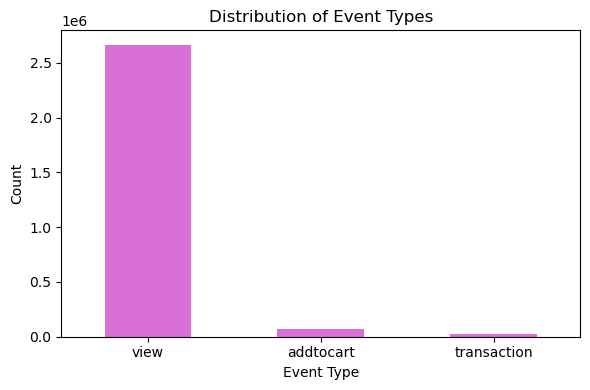

In [34]:
print(events_df['event'].value_counts())
event_counts = events_df['event'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
event_counts.plot(kind='bar', color='orchid')
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


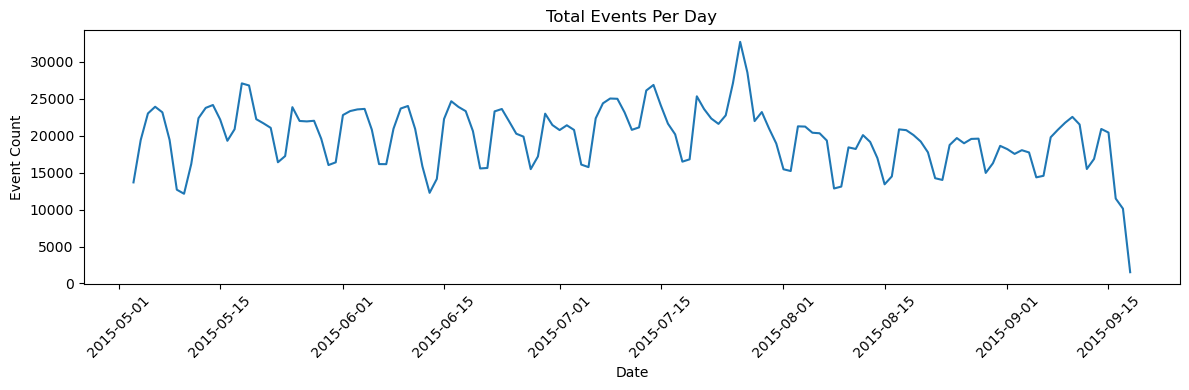

In [17]:
plt.figure(figsize=(12, 4))
events_df['date'].value_counts().sort_index().plot()
plt.title("Total Events Per Day")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

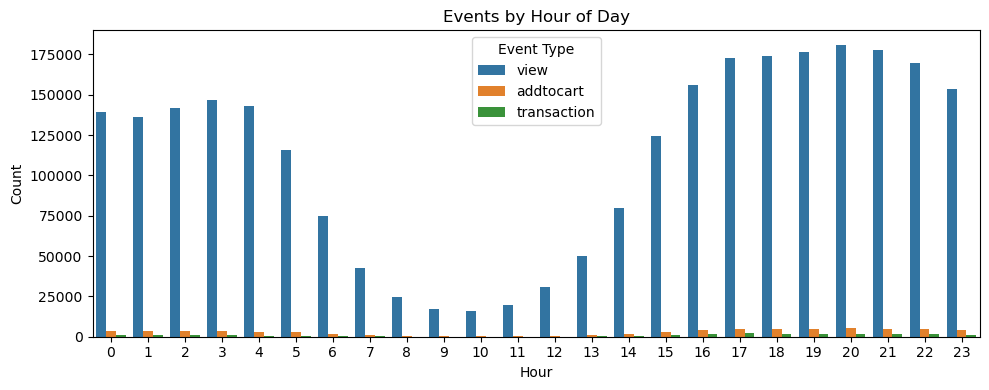

In [18]:
# 3. Event distribution by hour
plt.figure(figsize=(10, 4))
sns.countplot(data=events_df, x='hour', hue='event')
plt.title("Events by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title="Event Type")
plt.tight_layout()
plt.show()

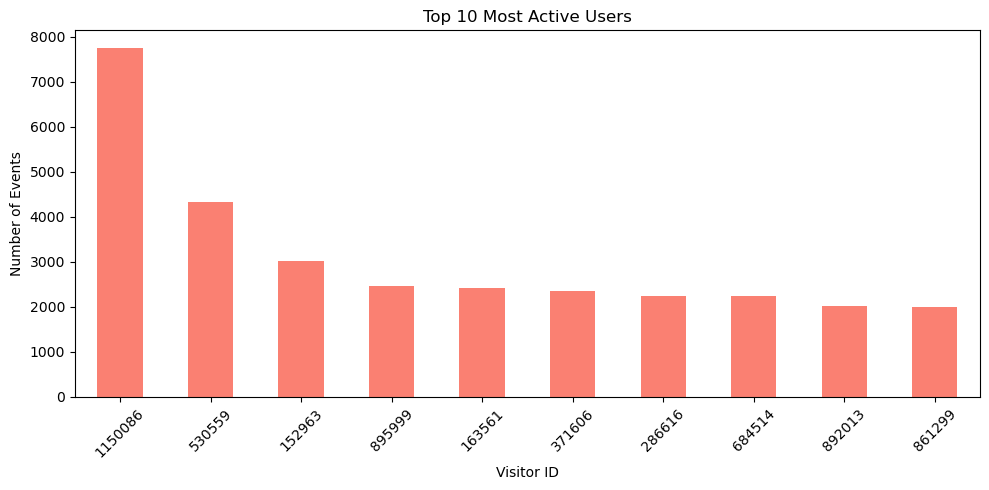

In [22]:
# Get top 10 most active users
top_users = events_df['visitorid'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_users.plot(kind='bar', color='salmon')
plt.title("Top 10 Most Active Users")
plt.xlabel("Visitor ID")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

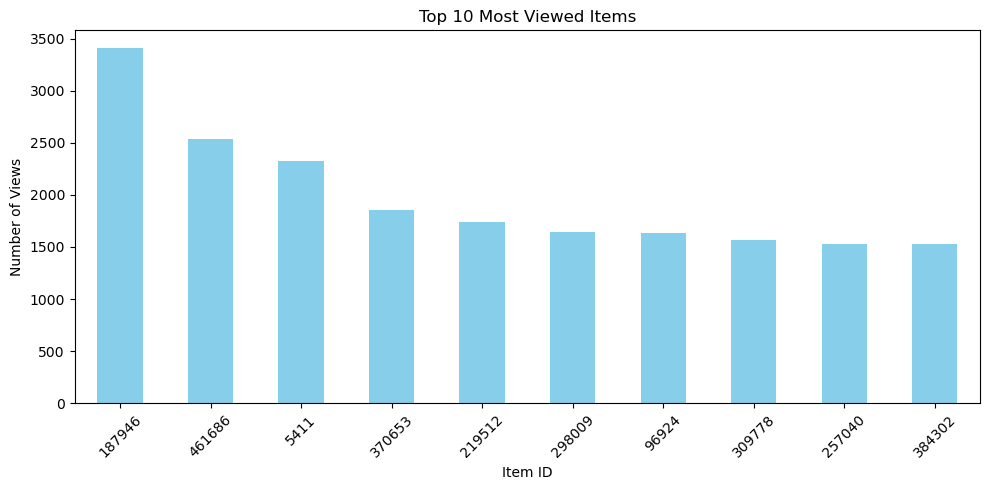

In [21]:
top_items = events_df[events_df['event'] == 'view']['itemid'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_items.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Viewed Items")
plt.xlabel("Item ID")
plt.ylabel("Number of Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

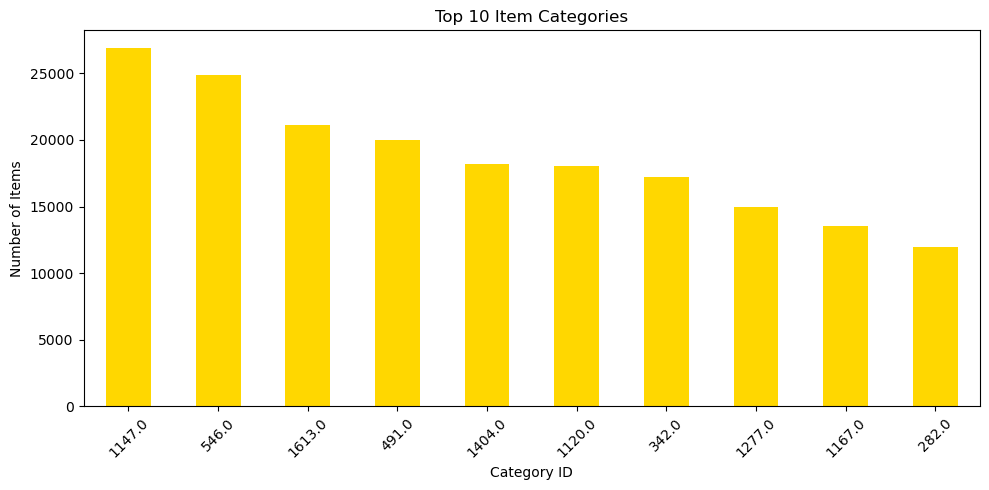

In [27]:
# Load the cleaned item properties and category data
item_props_df = pd.read_csv("item_properties.csv")
cat_tree_df = pd.read_csv("category_tree.csv")

# Get only the categoryid entries from item properties
item_category = item_props_df[item_props_df['property'] == 'categoryid'][['itemid', 'cleaned_value']]
item_category.columns = ['itemid', 'categoryid']

# Count top categories
top_categories = item_category['categoryid'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='gold')
plt.title("Top 10 Item Categories")
plt.xlabel("Category ID")
plt.ylabel("Number of Items")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
# Example: Let's say electronics are in these categories (you can update this list)
electronics_category_ids = [1338, 1002, 1401, 1661, 1051]  

# Filter for electronics items
electronics_items = item_category[item_category['categoryid'].isin(electronics_category_ids)]['itemid'].unique()

# Filter events to include only electronics items
electronics_events = events_df[events_df['itemid'].isin(electronics_items)].copy()
print("Filtered electronics events shape:", electronics_events.shape)


Filtered electronics events shape: (81973, 8)


In [51]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Encode visitorid and itemid
electronics_events['user_id'] = user_encoder.fit_transform(electronics_events['visitorid'])
electronics_events['item_id'] = item_encoder.fit_transform(electronics_events['itemid'])

# Sanity check
print(electronics_events[['visitorid', 'user_id', 'itemid', 'item_id']].head())

     visitorid  user_id  itemid  item_id
29     1153198    33109  388242     2896
30      273888     7838  205392     1570
63     1193904    34218  255275     1927
66     1153198    33109  357579     2661
109     870742    24975  456005     3410


In [55]:
# Create the interaction matrix
user_item_matrix = electronics_events.groupby(['user_id', 'item_id']).size().unstack(fill_value=0)

print("User-Item Matrix shape:", user_item_matrix.shape)
user_item_matrix.head()

User-Item Matrix shape: (40403, 3488)


item_id,0,1,2,3,4,5,6,7,8,9,...,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print("Number of users:", user_item_matrix.shape[0])
print("Number of items:", user_item_matrix.shape[1])
print("Number of non-zero interactions:", (user_item_matrix > 0).sum().sum())

Number of users: 40403
Number of items: 3488
Number of non-zero interactions: 64710


In [56]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


In [57]:
# Transpose user-item matrix to item-user
item_user_matrix = user_item_matrix.T

# Compute cosine similarity between items
item_similarity = cosine_similarity(item_user_matrix)

# Convert to DataFrame for easier handling
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

print("Item similarity matrix shape:", item_similarity_df.shape)
item_similarity_df.head()


Item similarity matrix shape: (3488, 3488)


item_id,0,1,2,3,4,5,6,7,8,9,...,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487
item_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036886


In [58]:
def get_similar_items(item_id, top_n=5):
    if item_id not in item_similarity_df.index:
        print("Item not found.")
        return []
    similar_items = item_similarity_df[item_id].sort_values(ascending=False)[1:top_n+1]
    return similar_items


In [59]:
# Try with an item_id from your data (use actual encoded item_id)
example_item_id = 10  # <- change this to one from your matrix
recommendations = get_similar_items(example_item_id, top_n=5)
print("Top 5 similar items to", example_item_id, ":\n", recommendations)

Top 5 similar items to 10 :
 item_id
0       0.0
2330    0.0
2319    0.0
2320    0.0
2321    0.0
Name: 10, dtype: float64


In [61]:
def recommend_items_for_user(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        print("User not found.")
        return []

    # Items the user has interacted with
    user_interactions = user_item_matrix.loc[user_id]
    interacted_items = user_interactions[user_interactions > 0].index.tolist()

    scores = {}

    for item in interacted_items:
        # Get similar items and their scores
        similar_items = item_similarity_df[item].drop(index=interacted_items)  # skip already interacted
        for sim_item, score in similar_items.items():
            scores[sim_item] = scores.get(sim_item, 0) + score

    # Sort by score
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    # Return top N recommended item_ids
    recommended_items = [item for item, _ in sorted_scores[:top_n]]
    return recommended_items



In [64]:
example_user_id = 5  # Use a real encoded user_id from your matrix
recommendations = recommend_items_for_user(example_user_id, top_n=5)

print(f"Top recommendations for user {example_user_id}:", recommendations)

Top recommendations for user 5: [423, 1832, 3357, 2310, 1818]


In [65]:
# Reverse label encoding
original_item_ids = item_encoder.inverse_transform(recommendations)
print("Recommended original item IDs:", original_item_ids)


Recommended original item IDs: [ 51360 242905 449912 311108 241874]


In [67]:
!pip install streamlit


  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------- ------------------- 5.0/9.8 MB 33.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 30.5 MB/s eta 0:00:00
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.
